# Pymaceuticals Inc.
---

### Analysis

- After assessing the tumor in mice we deduced that the Capomulin and Ramicane had the lowest of tumor sizes for the give options.
- When assessing the tumor treatment in a signle mouse l509 had drastic decrease in tumor size after 30 regimins.
    - However, this is not enought evidenve to call a correlation vs causationa argument and would have to have substantial more trials in both male and female mice with different size tumors to see the decrease.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_full_df = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")

# Display the data table for preview
mouse_full_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice.
number_mice = mouse_full_df['Mouse ID'].nunique()
number_mice

249

In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ID = mouse_full_df.loc[mouse_full_df.duplicated(
    subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dupe_ID

array(['g989'], dtype=object)

In [99]:
#Output confirmed duplicate ID
mouse_dupe= mouse_full_df[mouse_full_df[['Mouse ID', 'Timepoint']].duplicated()==True]

mouse_dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_ID_df = mouse_full_df.loc[mouse_full_df['Mouse ID'] =='g989',:]

dupe_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_full_df = mouse_full_df[mouse_full_df['Mouse ID'].isin(dupe_ID)==False]

mice_full_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [102]:
# Checking the number of mice in the clean DataFrame.
mice_full_df['Mouse ID'].nunique()

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mice_full_df.set_index(['Drug Regimen'])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_dose_df = drug_regimen.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_dose_df['Tumor Volume (mm3)'].mean().round(6)
tumor_median = drug_dose_df['Tumor Volume (mm3)'].median().round(6)
tumor_var = drug_dose_df['Tumor Volume (mm3)'].var().round(6)
tumor_std = drug_dose_df['Tumor Volume (mm3)'].std().round(4)
tumor_sem = drug_dose_df['Tumor Volume (mm3)'].sem().round(4)

# Assemble the resulting series into a single summary DataFrame.
regimen_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                         'Median Tumor Volume': tumor_median,
                         'Tumor Volume Variance': tumor_var,
                         'Tumor Volume Std. Dev.': tumor_std,
                         'Tumor Volume Std. Err.': tumor_sem})
regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.9948,0.3293
Ceftamin,52.591172,51.776157,39.290177,6.2682,0.4698
Infubinol,52.884795,51.820584,43.128684,6.5672,0.4922
Ketapril,55.235638,53.698743,68.553577,8.2797,0.6039
Naftisol,54.331565,52.509285,66.173479,8.1347,0.5965
Placebo,54.033581,52.288934,61.168083,7.8210,0.5813
Propriva,52.320930,50.446266,43.852013,6.6221,0.5443
Ramicane,40.216745,40.673236,23.486704,4.8463,0.3210
Stelasyn,54.233149,52.431737,59.450562,7.7104,0.5731


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_regimen = drug_regimen.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

aggregate_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen vs Timepoints')

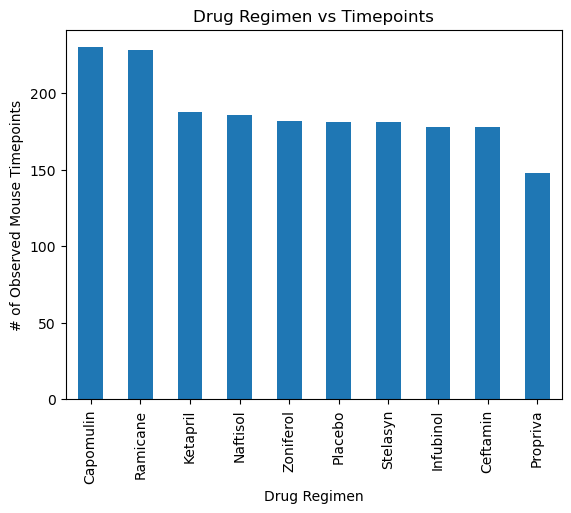

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_timepoint_df = mice_full_df[['Drug Regimen', 'Timepoint']]
drug_count = drug_timepoint_df['Drug Regimen'].value_counts()

drug_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')
plt.title('Drug Regimen vs Timepoints')

Text(0.5, 1.0, 'Drug Regimen vs Timepoints')

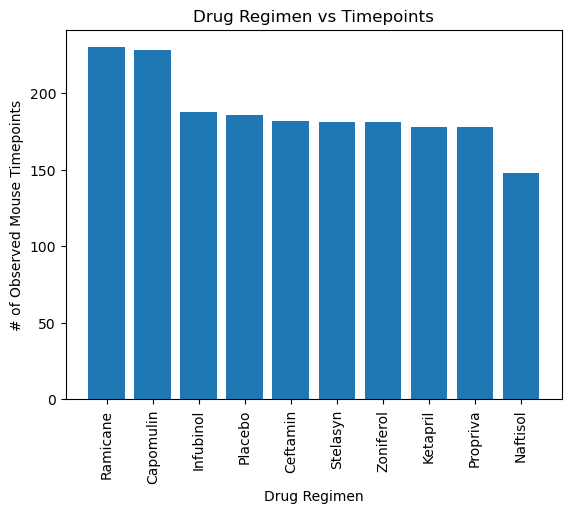

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_full_df['Drug Regimen'].unique()
y_axis = mice_full_df['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimen vs Timepoints')

In [107]:
mice_sex_df = mice_full_df[['Mouse ID', 'Sex']]
male_female_count = mice_sex_df['Sex'].value_counts()

male_female_count

Sex
Male      958
Female    922
Name: count, dtype: int64

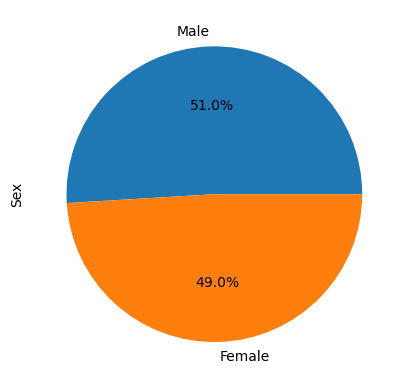

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = male_female_count.plot(kind='pie', autopct='%1.1f%%',startangle=0, ylabel = 'Sex')

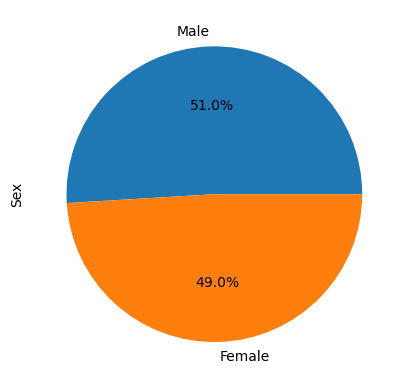

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_full_df['Sex'].unique()
mf_count = male_female_count

plt.pie(mf_count, labels=labels, autopct='%1.1f%%', startangle=0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_timepoint_df = mice_full_df.groupby(['Mouse ID'])['Timepoint'].max()

tumor_df = great_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

great_timepoint_tumor_df = pd.merge(tumor_df, mice_full_df, 
                                   how='left', on = ['Mouse ID', 'Timepoint'])
great_timepoint_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for drug in treatment_list:
    treat_df = great_timepoint_tumor_df.loc[great_timepoint_tumor_df['Drug Regimen']==drug,
                                         'Tumor Volume (mm3)']  
    tumor_vol_list.append(treat_df)
    #Calculate quartiles
    quartiles = treat_df.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')
treat_df

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

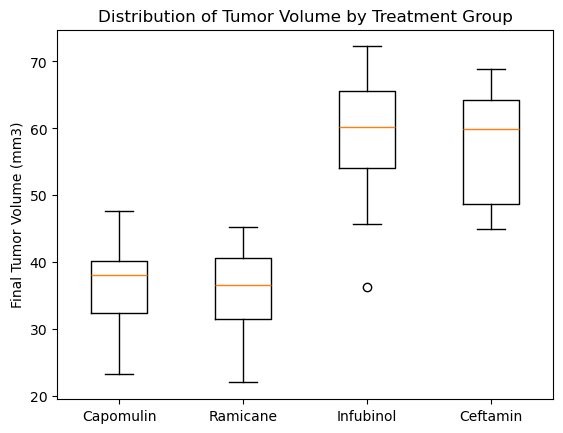

In [112]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [145]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug_type = 'Capomulin'

#Name new table Matt TA assisted
drug_table_df = mice_full_df.loc[mice_full_df['Drug Regimen']==drug_type]
#TA Assistance
one_mouse = drug_table_df[drug_table_df['Mouse ID']=='l509']

drug_table_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


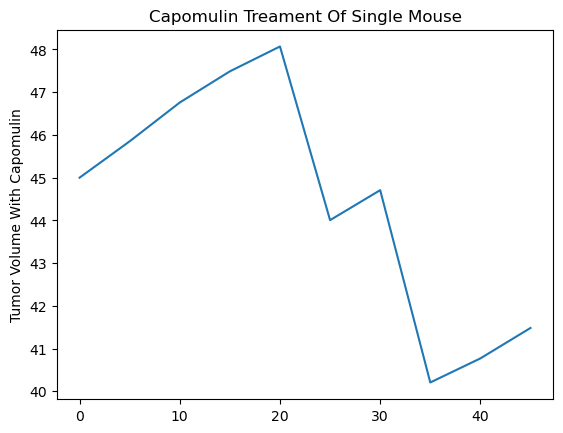

In [122]:
# capomulin_line_df.plot(x = 'Timepoint', y='Tumor Volume (mm3)', marker='^')
plt.plot(one_mouse['Timepoint'], one_mouse['Tumor Volume (mm3)'])
plt.ylabel(f'Tumor Volume With {drug_type}')
plt.title('Capomulin Treament Of Single Mouse')
plt.show()

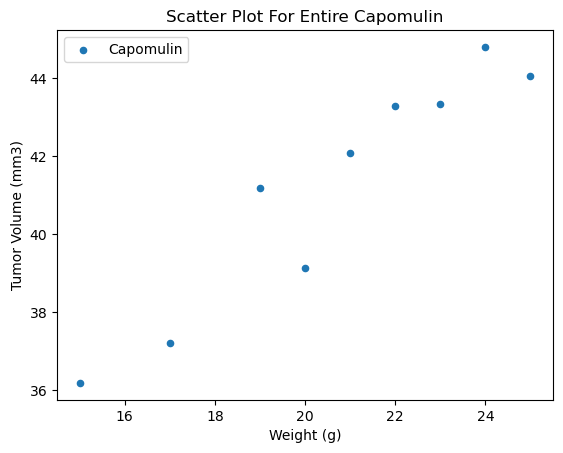

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_type = 'Capomulin'

scatter_df = mice_full_df.loc[mice_full_df['Drug Regimen']==drug_type]
#Chat GPT assisted code for average mean tumor volume
avg_tumor_vol = scatter_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

avg_tumor_vol.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', label = drug_type)



plt.scatter
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Scatter Plot For Entire {drug_type}')

plt.show()

## Correlation and Regression

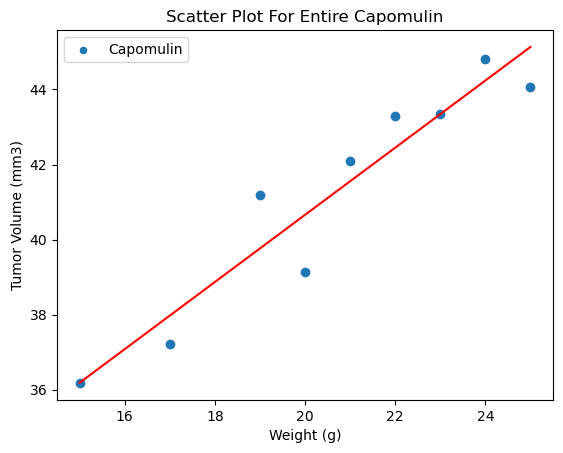

The correlation between mouse weight and the average tumor volume is 0.8947726097340629


In [158]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
drug_type = 'Capomulin'

scatter_df = mice_full_df.loc[mice_full_df['Drug Regimen']==drug_type]
#Chat GPT assisted code for average mean tumor volume
avg_tumor_vol = scatter_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

avg_tumor_vol.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', label = drug_type)

x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")


plt.scatter
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Scatter Plot For Entire {drug_type}')

plt.show()

#LinRegress Calculcation 
(slope, int, rvalue, pvalue, std_err) = linregress(x_values,y_values)

print(f"The correlation between mouse weight and the average tumor volume is {slope}")